In [2]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt # data visualization

## Criar o dataset para práticar

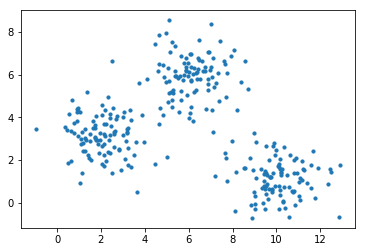

In [4]:
# Set three centers
cluster_center_1 = np.array([2,3])
cluster_center_2 = np.array([6,6])
cluster_center_3 = np.array([10,1])

# Generate random data for three clusters
cluster_data_1 = np.random.randn(100, 2) + cluster_center_1
cluster_data_2 = np.random.randn(100,2) + cluster_center_2
cluster_data_3 = np.random.randn(100,2) + cluster_center_3

dataset = np.concatenate((cluster_data_1, cluster_data_2, 
                         cluster_data_3), axis = 0)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

In [9]:
# save the data
np.savetxt("dataset.csv", dataset, delimiter=",")

## Carregar os dados e visualizar

In [10]:
# load the data with pandas
dataset = pd.read_csv('dataset.csv', header=None)

In [11]:
dataset.head()

,0,1
0,2.578324,2.590498
1,4.471942,1.823033
2,3.254061,1.738031
3,2.560916,4.440591
4,0.892697,4.256820


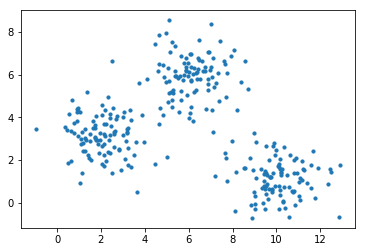

In [12]:
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

### 1. Inicializar os centróides

dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html 

In [7]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centroides calculados - [k,n]
    """
    
    #### CODE HERE ####
    
    minimum = np.min(dataset, axis=0)
    maximum = np.max(dataset, axis=0)
    shape = [k, dataset.shape[1]]
    centroids = np.random.uniform(minimum, maximum, size=shape)
    
    ### END OF CODE ###
    
    return centroids

In [8]:
k = 3
centroids = calculate_initial_centers(dataset, k)

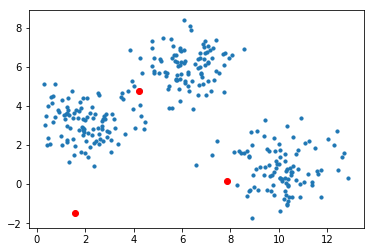

In [9]:
plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

### 2. definir os clusters

#### 2.1 Função de distância

$$ d(a,b) = \sqrt{(a_1-b_1)^{2}+(a_2-b_2)^{2}+ ... + (a_n-b_n)^{2}} $$

$$ d(a,b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^{2}} $$

In [10]:
def euclidean_distance(a,b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - (1,n)
    b -- Um ponto no espaço - (1,n)
    
    Retornos:
    distance -- Distância entre os pontos
    """
    
    #### CODE HERE ####
    
    distance = np.sqrt(np.sum(np.square(a-b)))
    
    ### END OF CODE ###
    
    return distance
    

#### 2.2 Calcular centroid mais próximo

dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

In [11]:
def nearest_centroid(a, centroids):
    """
    Calcula o indice do centroid mais próximo ao ponto a
    
    Argumentos:
    a -- Um ponto no espaço - (1,n)
    centroids -- Lista com os centroides - (k,n)
    
    Retornos:
    nearest_index -- Índice do centroid mais próximo
    """
    
    #### CODE HERE ####
    
    # Inicializa as distâncias com zero
    distance_centroids = np.zeros(centroids.shape[0])
    
    for index, centroid in enumerate(centroids):
        distance = euclidean_distance(a,centroid)
        distance_centroids[index] = distance
    
    nearest_index = np.argmin(distance_centroids)
      
    ### END OF CODE ###
    
    return nearest_index
    

#### 2.3 Calcular centroid mais próximo de cada ponto no dataset

In [12]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o indice do centroid mais próximo para cada 
    ponto do dataset
    
    Argumentos:
    dataset -- Conjunto de dados - (m,n)
    centroids -- Lista com os centroides - (k,n)
    
    Retornos:
    nearest_indexes -- Indices do centroids mais próximos - (m,1)
    """
    
    #### CODE HERE ####
    
    # Inicializa as distâncias com zero
    nearest_indexes = np.zeros(dataset.shape[0])
    
    for index, a in enumerate(dataset):
        nearest_indexes[index] = nearest_centroid(a, centroids)
      
    ### END OF CODE ###
    
    return nearest_indexes
    

In [13]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

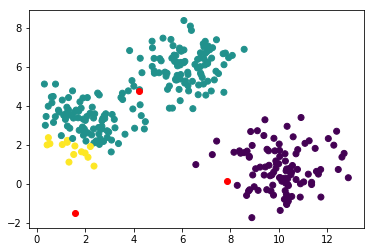

In [14]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

#### 2.4 Calcula a inércia

In [15]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o 
    centro do cluster mais próximo.
    
    Argumentos:
    dataset -- Conjunto de dados - (m,n)
    centroids -- Lista com os centroides - (k,n)
    nearest_indexes -- Indices do centroids mais próximos - (m,1)
    
    Retornos:
    distortion -- Valor da soma total do erro
    """
    
    #### CODE HERE ####
    
    distortion = 0
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:] 
        for a in dataframe:
            distortion += np.square(euclidean_distance(a, centroid))
      
    ### END OF CODE ###
    
    return distortion

In [16]:
inertia(dataset, centroids, nearest_indexes)

2343.0441759621176

### 3. Atualizar os clusters

In [139]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids
    
    Argumentos:
    dataset -- Conjunto de dados - (m,n)
    centroids -- Lista com os centroides - (k,n)
    nearest_indexes -- Indices do centroids mais próximos - (m,1)
    
    Retornos:
    updated_centroids -- Centroids atualizados - (1,n)
    """
    
    #### CODE HERE ####
    
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:] 
        if(dataframe.size != 0):
            centroids[index] = np.mean(dataframe, axis=0)
      
    ### END OF CODE ###
    
    return centroids

In [136]:
dataframe = dataset[nearest_indexes == 5,:]
dataframe.size == 0

True

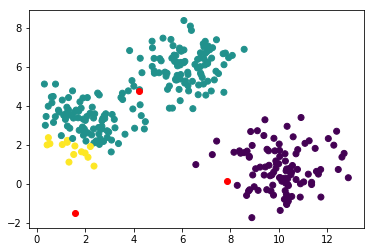

In [18]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [19]:
centroids = update_centroids(dataset, centroids, nearest_indexes)
nearest_indexes = all_nearest_centroids(dataset, centroids)

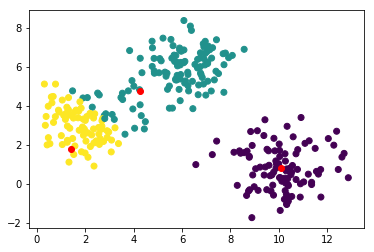

In [20]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [21]:
inertia(dataset, centroids, nearest_indexes)

1237.1825143910285

### 4. KMeans

In [221]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self,X):
        
        self.cluster_centers_ = calculate_initial_centers(X, self.n_clusters)
        
        self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
        
        old_inertia = inertia(X, self.cluster_centers_, self.labels_)
        
        for iter in range(self.max_iter):
            
            self.cluster_centers_ = update_centroids(X, self.cluster_centers_, self.labels_)
            self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)
            
            if(old_inertia == self.inertia_):
                break
            else:
                old_inertia = self.inertia_   
        
        return self
    
    def predict(self, X):
        
        return all_nearest_centroids(X, self.cluster_centers_)
        

Inércia =  615.4232500500243


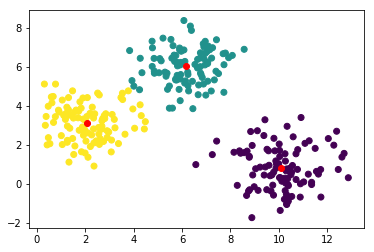

In [261]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

### 5. Comparar resultado com scikit-learn

dica: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans

Inércia =  615.4232500500243


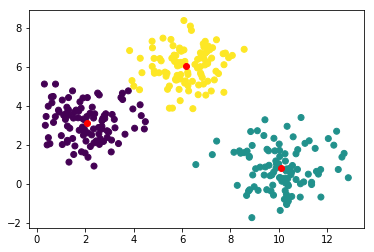

In [260]:
from sklearn.cluster import KMeans as scikit_KMeans

scikit_kmeans = scikit_KMeans(n_clusters=3)
scikit_kmeans.fit(dataset)

print("Inércia = ", scikit_kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=scikit_kmeans.labels_)
plt.scatter(scikit_kmeans.cluster_centers_[:,0], 
            scikit_kmeans.cluster_centers_[:,1], c='red')

plt.show()

### 6. Método do cotovelo

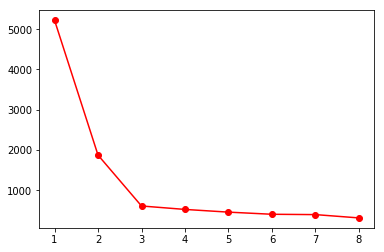

In [201]:
n_clusters_test = 8

n_sequence = np.arange(1,n_clusters_test+1)
inertia_vec = np.zeros(n_clusters_test)

for index, n_cluster in enumerate(n_sequence):
    inertia_vec[index] = KMeans(n_clusters=n_cluster).fit(dataset).inertia_
    
plt.plot(n_sequence, inertia_vec,'ro-')
plt.show()

### 7. Dataset Real

Exercícios

1 - Aplique o algoritmo do K-means desenvolvido por você no datatse iris. Mostre os resultados obtidos utilizando pelo menos duas métricas de avaliação de clusteres [1].

- [1] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

> Dica: você pode utilizar as métricas completeness e homogeneity.

2 - Tente melhorar o resultado obtido na questão anterior utilizando uma técnica de mineração de dados. Explique a diferença obtida. 

> Dica: você pode tentar normalizar os dados [2].
> - [2] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html


3 - Qual o número de clusteres (K) você escolheu na questão anterior? Desenvolva o Método do Cotovelo sem usar biblioteca e descubra o valor de K mais adequado. Após descobrir, utilize o valor obtido no algoritmo do K-means.

4 - Utilizando os resultados da questão anterior, refaça o cálculo das métricas e comente os resultados obtidos. Houve uma melhoria? Explique.

http://archive.ics.uci.edu/ml/datasets/iris

In [216]:
from sklearn import datasets

#Carrega o dataset iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [214]:
len(np.array(df))

150

In [208]:
#Carrega em y as classes
y = iris.target 
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [218]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [248]:
kmeans = KMeans(n_clusters=3).fit(np.array(df))
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [222]:
from sklearn import metrics

In [249]:
#Utilizar métricas de avaliação de clusteres (completeness e homogeneity)
score_homo = metrics.homogeneity_score(y,kmeans.labels_)
score_comp = metrics.completeness_score(y,kmeans.labels_) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.7514854021988338
completeness = 0.7649861514489815


### 7.1 Normalizar

In [242]:
from sklearn.preprocessing import normalize

In [243]:
df_norm = normalize(df)

In [250]:
kmeans = KMeans(n_clusters=3).fit(np.array(df_norm))
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [251]:
#Utilizar métricas de avaliação de clusteres (completeness e homogeneity)
score_homo = metrics.homogeneity_score(y,kmeans.labels_)
score_comp = metrics.completeness_score(y,kmeans.labels_) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.8983263672602775
completeness = 0.9010648908640206


### 7.2 Visualizar dataset

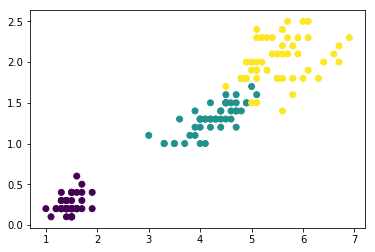

In [264]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=y)
plt.show()

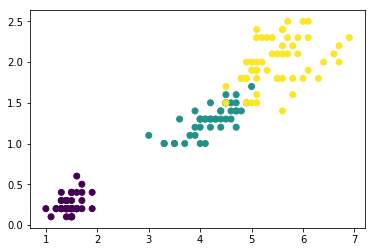

In [269]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], 
            c=KMeans(n_clusters=3).fit(np.array(df_norm)).labels_)
plt.show()

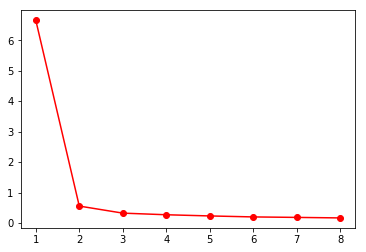

In [273]:
n_clusters_test = 8

n_sequence = np.arange(1,n_clusters_test+1)
inertia_vec = np.zeros(n_clusters_test)

for index, n_cluster in enumerate(n_sequence):
    inertia_vec[index] = KMeans(n_clusters=n_cluster).fit(df_norm).inertia_
    
plt.plot(n_sequence, inertia_vec,'ro-')
plt.show()

O kmeans com k = 3 deu um bom resultado, quando utilizado a euristica do método do cotovelo, o indicado foi usar duas classes, de acordo com a distância aos centroides, porém o resultado ficou pior. Indicando que o K = 3 é realmente uma boa escolha. Para este caso o método do cotovelo falhou, por causa da distribuição dos dados 